## Data Exploration

In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv("Telco_data_preproc.csv", index_col = 0)

In [22]:
df.head()

,customerID,gender_proc,partner_proc,dependents_proc,phone_service_proc,churn_proc,paperless_billing_proc,multiple_lines_proc,internet_service_proc,online_security_proc,...,tech_support_proc,streaming_tv_proc,streaming_movies_proc,tenure,contract_proc,payment_method_proc,MonthlyCharges,TotalCharges,SeniorCitizen,online_backup_proc
0,7590-VHVEG,1,1,0,0,0,1,-1,1,-1,...,-1,-1,-1,1,1,1,29.85,29.85,0,1
1,5575-GNVDE,0,0,0,1,0,0,-1,1,1,...,-1,-1,-1,34,2,2,56.95,1889.50,0,-1
2,3668-QPYBK,0,0,0,1,1,1,-1,1,1,...,-1,-1,-1,2,1,2,53.85,108.15,0,1
3,7795-CFOCW,0,0,0,0,0,0,-1,1,1,...,1,-1,-1,45,2,3,42.30,1840.75,0,-1
4,9237-HQITU,1,0,0,1,1,1,-1,2,-1,...,-1,-1,-1,2,1,1,70.70,151.65,0,-1


In [23]:
df.shape

(7043, 21)

In [24]:
df.customerID.nunique() == df.shape[0]

True

Only one observation per customer, so no way to track change in customer variables over time.

In [25]:
# df.describe()

In [26]:
# splitting the dataset in 80/20 train/test
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
# cleaning up column names format
cols = ["customer_id", "gender", "partner", "dependents", "phone_service", "churn", "paperless_billing", "multiple_lines", "internet_service",
        "online_security", "device_protection", "tech_support", "streaming_tv", "streaming_movies", "tenure", "contract", "payment_method",
        "monthly_charges", "total_charges", "senior_citizen", "online_backup"]

df_train.columns = cols
df_test.columns = cols

In [28]:
# saving train/test split
df_train.to_csv("telco_train.csv")
df_test.to_csv("telco_test.csv")

## Visualizing churn / no churn using PCA

In [29]:
df = pd.read_csv("telco_train.csv", index_col=0)

In [30]:
from sklearn.preprocessing import StandardScaler

y = df.churn.values
df_x = df.drop(labels = ["customer_id", "churn"], axis=1)
X = df_x.values

X = StandardScaler().fit_transform(X)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, 
                          columns = ["PC1", "PC2"])

In [32]:
finalDf = pd.concat([principalDf, df.churn], axis=1)

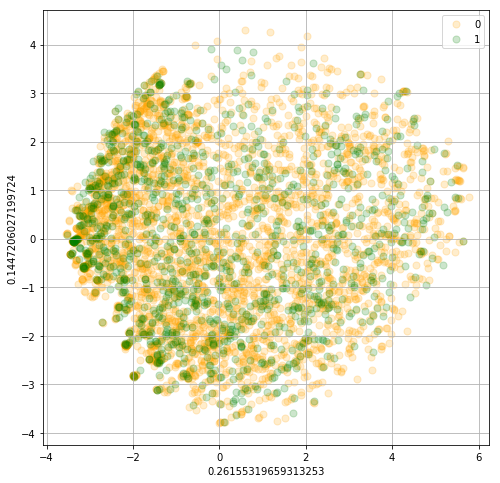

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

var = pca.explained_variance_ratio_
ax.set_xlabel(var[0])
ax.set_ylabel(var[1])

target = [0, 1]
colors = ('orange', 'green')
for target, color in zip(target, colors):
    indicesToKeep = finalDf.churn == target
    ax.scatter(finalDf.loc[indicesToKeep, "PC1"], 
               finalDf.loc[indicesToKeep, "PC2"], 
               c = color, 
               s = 50,
               alpha = 0.2)

ax.legend(["0", "1"])
ax.grid()

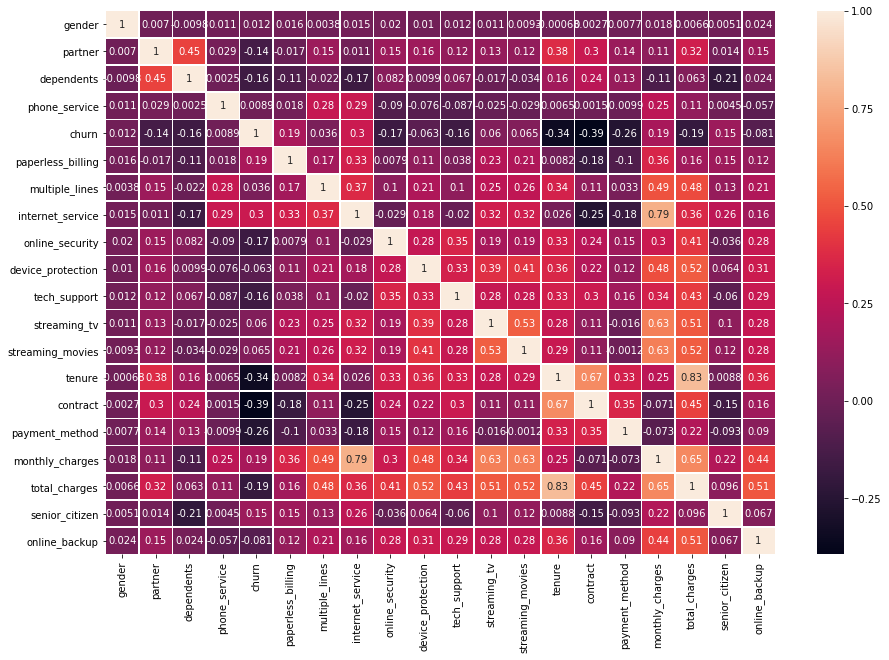

In [41]:
import seaborn as sns

corr = df.drop("customer_id", axis=1).corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)